In [13]:
from numpy import *
import matplotlib.pyplot as plt
import matplotlib

In [7]:
def loadDataSet(fileName, delim='\t'):
    fr = open(fileName)
    stringArr = [line.strip().split(delim) for line in fr.readlines()]
    datArr = [list(map(float, line)) for line in stringArr]
    return mat(datArr)

In [8]:
def pca(dataMat, topNfeat=9999999):
    meanVals = mean(dataMat, axis=0)
    meanRemoved = dataMat - meanVals
    covMat = cov(meanRemoved, rowvar=0)
    eigVals, eigVecs = linalg.eig(mat(covMat))
    eigValInd = argsort(eigVals)
    eigValInd = eigValInd[:-(topNfeat+1):-1]
    redEigVecs = eigVecs[:, eigValInd]
    lowDataMat = meanRemoved*redEigVecs
    reconMat = (lowDataMat*redEigVecs.T)+ meanVals
    return lowDataMat, reconMat

In [9]:
dataMat = loadDataSet('testSet.txt')

In [20]:
lowMat, reconMat = pca(dataMat, 1)

In [21]:
shape(lowMat)

(1000, 1)

In [22]:
lowMat

matrix([[-2.51033597e+00],
        [-2.86915379e+00],
        [ 9.74108510e-02],
        [-7.67782222e-01],
        [ 1.02715333e+00],
        [-1.44409178e+00],
        [-2.17360352e+00],
        [-7.73998803e-01],
        [-1.09983463e+00],
        [-1.70275987e+00],
        [-5.39605615e-01],
        [-9.15572638e-01],
        [-2.42669452e+00],
        [ 2.93613464e+00],
        [ 3.92702506e-01],
        [ 2.59205734e+00],
        [ 4.96435625e-01],
        [-1.52069930e+00],
        [ 1.25471104e-01],
        [ 1.41846162e+00],
        [ 5.89902904e-01],
        [ 6.69601540e-01],
        [ 3.25466068e-01],
        [ 1.18812333e+00],
        [ 2.07790920e+00],
        [ 3.24938650e-01],
        [ 3.41109884e+00],
        [ 1.92249899e+00],
        [-6.57788287e-01],
        [-3.56836313e-01],
        [ 5.72240108e-02],
        [ 1.13444036e+00],
        [-2.47196176e-01],
        [ 1.14678135e+00],
        [ 1.62503940e+00],
        [-2.11489136e+00],
        [ 1.62262452e+00],
 

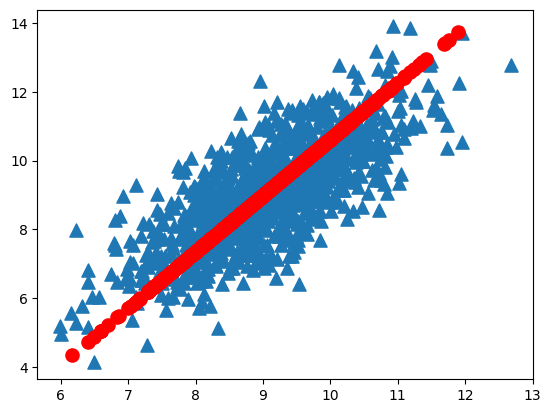

In [23]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(dataMat[:,0].flatten().A[0], dataMat[:,1].flatten().A[0], marker='^', s=90)
ax.scatter(reconMat[:,0].flatten().A[0], reconMat[:,1].flatten().A[0], marker='o', s=90, c='red')

In [25]:
def replaceNanWithMean():
    datMat = loadDataSet('secom.data', ' ')
    numFeat = shape(datMat)[1]
    for i in range(numFeat):
        meanVal = mean(datMat[nonzero(~isnan(datMat[:,i].A))[0], i])
        datMat[nonzero(isnan(datMat[:,i].A))[0], i] = meanVal
    return datMat


In [26]:
dataMat = replaceNanWithMean()
meanVals = mean(dataMat, axis=0)
meanRemoved = dataMat-meanVals

In [28]:
covMat = cov(meanRemoved, rowvar=0)
eigVals, eigVecs = linalg.eig(mat(covMat))
eigVals

array([ 5.34151979e+07+0.00000000e+00j,  2.17466719e+07+0.00000000e+00j,
        8.24837662e+06+0.00000000e+00j,  2.07388086e+06+0.00000000e+00j,
        1.31540439e+06+0.00000000e+00j,  4.67693557e+05+0.00000000e+00j,
        2.90863555e+05+0.00000000e+00j,  2.83668601e+05+0.00000000e+00j,
        2.37155830e+05+0.00000000e+00j,  2.08513836e+05+0.00000000e+00j,
        1.96098849e+05+0.00000000e+00j,  1.86856549e+05+0.00000000e+00j,
        1.52422354e+05+0.00000000e+00j,  1.13215032e+05+0.00000000e+00j,
        1.08493848e+05+0.00000000e+00j,  1.02849533e+05+0.00000000e+00j,
        1.00166164e+05+0.00000000e+00j,  8.33473762e+04+0.00000000e+00j,
        8.15850591e+04+0.00000000e+00j,  7.76560524e+04+0.00000000e+00j,
        6.66060410e+04+0.00000000e+00j,  6.52620058e+04+0.00000000e+00j,
        5.96776503e+04+0.00000000e+00j,  5.16269933e+04+0.00000000e+00j,
        5.03324580e+04+0.00000000e+00j,  4.54661746e+04+0.00000000e+00j,
        4.41914029e+04+0.00000000e+00j,  4.15532551